In this lecture we're going to address how you can bring multiple dataframe objects together, either by
merging them horizontally, or by concatenating them vertically. Before we jump into the code, we need to
address a little relational theory and to get some language conventions down. I'm going to bring in an image
to help explain some concepts.

![Venn Diagram](merging1.png)


Ok, this is a Venn Diagram. A Venn Diagram is traditionally used to show set membership. For example, the 
circle on the left is the population of students at a university. The circle on the right is the population
of  staff at a university. And the overlapping region in the middle are all of those students who are also
staff.  Maybe these students run tutorials for a course, or grade assignments, or engage in running research
 experiments.

So, this diagram shows two populations whom we might have data about, but there is overlap between those 
populations.

When it comes to translating this to pandas, we can think of the case where we might have these two 
populations as indices in separate DataFrames, maybe with the label of Person Name. When we want to join the
DataFrames together, we have some choices to make. First what if we want a list of all the people regardless
of whether they're staff or student, and all of the information we can get on them? In database terminology,
this is called a full outer join. And in set theory, it's called a union. In the Venn diagram, it represents
everyone in any circle.

Here's an image of what that would look like in the Venn diagram.

![Union](merging2.png)

It's quite possible though that we only want those people who we have maximum information for, those people
who are both staff and students. Maybe being a staff member and a student involves getting a tuition waiver,
and we want to calculate the cost of this. In database terminology, this is called an inner join. Or in set
theory, the intersection. It is represented in the Venn diagram as the overlapping parts of each circle.

Here's what that looks like: ![Intersection](merging3.png)


In [86]:
# With that background, let's see an example of how we would do this in pandas, where we would use the merge
# function.
import pandas as pd

# First we create two DataFrames, staff and students.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
# And lets index these staff by name
staff_df = staff_df.set_index('Name')
# Now we'll create a student dataframe
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
# And we'll index this by name too
student_df = student_df.set_index('Name')

# And lets just print out the dataframes
print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [28]:
# There's some overlap in these DataFrames in that James and Sally are both students and staff, but Mike and
# Kelly are not. Importantly, both DataFrames are indexed along the value we want to merge them on, which is
# called Name.

In [87]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [29]:
# If we want the union of these, we would call merge() passing in the DataFrame on the left and the DataFrame
# on the right and telling merge that we want it to use an outer join. We want to use the left and right
# indices as the joining columns.

pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [30]:
# We see in the resulting DataFrame that everyone is listed. And since Mike does not have a role, and John
# does not have a school, those cells are listed as missing values.

# If we wanted to get the intersection, that is, just those who are a student AND a staff, we could set the
# how attribute to inner. Again, we set both left and right indices to be true as the joining columns
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [31]:
# And we see the resulting DataFrame has only James and Sally in it. Now there are two other common use cases
# when merging DataFrames, and both are examples of what we would call set addition. The first is when we
# would want to get a list of all staff regardless of whether they were students or not. But if they were
# students, we would want to get their student details as well. To do this we would use a left join. It is
# important to note the order of dataframes in this function: the first dataframe is the left dataframe and
# the second is the right

pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [32]:
# You could probably guess what comes next. We want a list of all of the students and their roles if they were
# also staff. To do this we would do a right join.
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [33]:
# We can also do it another way. The merge method has a couple of other interesting parameters. First, you
# don't need to use indices to join on, you can use columns as well. Here's an example. Here we have a
# parameter called "on", and we can assign a column that both dataframe has as the joining column

# First, lets remove our index from both of our dataframes
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

# Now lets merge using the on parameter
pd.merge(staff_df, student_df, how='right', on='Name')

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course liasion,Engineering


In [34]:
# Using the "on" parameter instead of a the index is how I find myself using merge() the most.

In [105]:
# So what happens when we have conflicts between the DataFrames? Let's take a look by creating new staff and
# student DataFrames that have a location information added to them.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 
                            'Location': '512 Wilson Crescent'}])

# In the staff DataFrame, this is an office location where we can find the staff person. And we can see the
# Director of HR is on State Street, while the two students are on Washington Avenue, and these locations just
# happen to be right outside my window as I film this. But for the student DataFrame, the location information
# is actually their home address.

# The merge function preserves this information, but appends an _x or _y to help differentiate between which
# index went with which column of data. The _x is always the left DataFrame information, and the _y is always
# the right DataFrame information.

# Here, if we want all the staff information regardless of whether they were students or not. But if they were
# students, we would want to get their student details as well.Then we can do a left join and on the column of
# Name

newdf = pd.merge(staff_df, student_df, how='left', on='Name')

In [106]:
newdf

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [107]:
newdf.set_index('Role', inplace = True)
newdf

,Name,Location_x,School,Location_y
Role,,,,
Director of HR,Kelly,State Street,NaN,NaN
Course liasion,Sally,Washington Avenue,Engineering,512 Wilson Crescent
Grader,James,Washington Avenue,Business,1024 Billiard Avenue


In [109]:
newdf.reset_index(inplace = True)
newdf

,Role,Name,Location_x,School,Location_y
0,Director of HR,Kelly,State Street,NaN,NaN
1,Course liasion,Sally,Washington Avenue,Engineering,512 Wilson Crescent
2,Grader,James,Washington Avenue,Business,1024 Billiard Avenue


In [89]:
staff_df

,Name,Role,Location
0,Kelly,Director of HR,State Street
1,Sally,Course liasion,Washington Avenue
2,James,Grader,Washington Avenue


In [90]:
student_df

,Name,School,Location
0,James,Business,1024 Billiard Avenue
1,Mike,Law,Fraternity House #22
2,Sally,Engineering,512 Wilson Crescent


In [36]:
# From the output, we can see there are columns Location_x and Location_y. Location_x refers to the Location
# column in the left dataframe, which is staff dataframe and Location_y refers to the Location column in the
# right dataframe, which is student dataframe.

# Before we leave merging of DataFrames, let's talk about multi-indexing and multiple columns. It's quite
# possible that the first name for students and staff might overlap, but the last name might not. In this
# case, we use a list of the multiple columns that should be used to join keys from both dataframes on the on
# parameter. Recall that the column name(s) assigned to the on parameter needs to exist in both dataframes.

# Here's an example with some new student and staff data
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 
                            'School': 'Engineering'}])

# As you see here, James Wilde and James Hammond don't match on both keys since they have different last
# names. So we would expect that an inner join doesn't include these individuals in the output, and only Sally
# Brooks will be retained.
pd.merge(staff_df, student_df, how='inner', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


In [38]:
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [39]:
student_df

,First Name,Last Name,School
0,James,Hammond,Business
1,Mike,Smith,Law
2,Sally,Brooks,Engineering


In [41]:
pd.merge(staff_df, student_df, how='outer', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Kelly,Desjardins,Director of HR,NaN
1,Sally,Brooks,Course liasion,Engineering
2,James,Wilde,Grader,NaN
3,James,Hammond,NaN,Business
4,Mike,Smith,NaN,Law


In [37]:
# Joining dataframes through merging is incredibly common, and you'll need to know how to pull data from
# different sources, clean it, and join it for analysis. This is a staple not only of pandas, but of database
# technologies as well.

In [12]:
# If we think of merging as joining "horizontally", meaning we join on similar values in a column found in two
# dataframes then concatenating is joining "vertically", meaning we put dataframes on top or at the bottom of
# each other

# Let's understand this from an example. You have a dataset that tracks some information over the years. And
# each year's record is a separate CSV and every CSV ofr every year's record has the exactly same columns.
# What happens if you want to put all the data, from all years' record, together? You can concatenate them.

In [13]:
# Let's take a look at the US Department of Education College Scorecard data It has each US university's data
# on student completion, student debt, after-graduation income, etc. The data is stored in separate CSV's with
# each CSV containing a year's record Let's say we want the records from 2011 to 2013 we first create three
# dataframe, each containing one year's record. And, because the csv files we're working with are messy, I
# want to supress some of the jupyter warning messages and just tell read_csv to ignore bad lines, so I'm
# going to start the cell with a cell magic called %%capture

In [21]:
# %%capture
# df_2011 = pd.read_csv("college_scorecard/MERGED2011_12_PP.csv", error_bad_lines=False)
# df_2012 = pd.read_csv("college_scorecard/MERGED2012_13_PP.csv", error_bad_lines=False)
# df_2013 = pd.read_csv("college_scorecard/MERGED2013_14_PP.csv", error_bad_lines=False)

In [22]:
# # Let's get a view of one of the dataframes
# df_2011.head(3)

In [23]:
# # We see that there is a whopping number of columns - more than 1900! We can calculate the length of each
# # dataframe as well
# print(len(df_2011))
# print(len(df_2012))
# print(len(df_2013))

In [24]:
# # That's a bit surprising that the number of schools in the scorecard for 2011 is almost double that of the
# # next two years. But let's not worry about that. Instead, let's just put all three dataframes in a list and
# # call that list frames and pass the list into the concat() function Let's see what it looks like

# frames = [df_2011, df_2012, df_2013]
# pd.concat(frames)

In [25]:
# # As you can see, we have more observations in one dataframe and columns remain the same. If we scroll down to
# # the bottom of the output, we see that there are a total of 30,832 rows after concatenating three dataframes.
# # Let's add the number of rows of the three dataframes and see if the two numbers match
# len(df_2011)+len(df_2012)+len(df_2013)

In [26]:
# # The two numbers match! Which means our concatenation is successful. But wait, now that all the data is
# # concatenated together, we don't know what observations are from what year anymore! Actually the concat
# # function has a parameter that solves such problem with the keys parameter, we can set an extra level of
# # indices, we pass in a list of keys that we want to correspond to the dataframes into the keys parameter

# # Now let's try it out
# pd.concat(frames, keys=['2011','2012','2013'])

In [20]:
# Now we have the indices as the year so we know what observations are from what year. You should know that
# concatenation also has inner and outer method. If you are concatenating two dataframes that do not have
# identical columns, and choose the outer method, some cells will be NaN. If you choose to do inner, then some
# observations will be dropped due to NaN values. You can think of this as analogous to the left and right
# joins of the merge() function.

Now you know how to merge and concatenate datasets together. You will find such functions very useful for
combining data to get more complex or complicated results and to do analysis with. A solid understanding of
how to merge data is absolutely essentially when you are procuring, cleaning, and manipulating data. It's
worth knowing how to join different datasets quickly, and the different options you can use when joining
datasets, and I would encourage you to check out the pandas docs for joining and concatenating data.

In [42]:
import numpy as np

a = np.arange(8)
b = a[4:6]
b[:] = 40
c = a[4] + a[6]

In [45]:
a

array([ 0,  1,  2,  3, 40, 40,  6,  7])

In [46]:
c

46

In [47]:
import re
s = 'ABCAC'

In [48]:
bool(re.match('A', s)) == True

True

In [49]:
len(re.search('A', s)) == 2

TypeError: object of type 're.Match' has no len()

In [50]:
len(re.search('A', s)) == 2

TypeError: object of type 're.Match' has no len()

In [51]:
len(re.split('A', s)) == 2

False

In [58]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'
    result = []
    # compete the pattern below
    pattern = '([A-Z])AAA'
    for item in re.finditer(pattern, s):
      # identify the group number below.
      result.append(item.group())
      
    return result
result()

['CAAA', 'FAAA', 'BAAA']

In [63]:
s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'
pattern = '([A-Z])AAA'
re.finditer(pattern, s)
for i in re.finditer(pattern, s):
    print(i)

<re.Match object; span=(7, 11), match='CAAA'>
<re.Match object; span=(34, 38), match='FAAA'>
<re.Match object; span=(39, 43), match='BAAA'>


In [64]:
re.findall(pattern, s)

['C', 'F', 'B']

In [65]:
def result():
    s = 'ACAABAACAAABACDBADDDFSDDDFFSSSASDAFAAACBAAAFASD'
    result = []
    # compete the pattern below
    pattern = '([A-Z])AAA'
    result =   re.findall(pattern, s)
      
    return result
result()

['C', 'F', 'B']

In [73]:
s1 ={ 'M':20
     ,'S':15
     ,'B':18
     ,'V':31 }

s2 ={ 'S':20
     ,'V':30
     ,'Ba':15
     ,'M':20  
     , 'P' :20}


In [76]:
s1 = pd.Series(s1)
s2 = pd.Series(s2)

In [77]:
s3 = s1.add(s2)

In [78]:
s3

B      NaN
Ba     NaN
M     40.0
P      NaN
S     35.0
V     61.0
dtype: float64

In [80]:
s3['M'] >=  s1.add(s2, fill_value = 0)['M']

True

In [82]:
s3['B'] == s1.add(s2, fill_value = 0)['B']

False

In [84]:
s3['B'] == s1['B']

False

In [85]:
s3['P'] >= s3['M']

False

In [110]:
S = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])

In [111]:
S['b':'e']

b    1
c    2
d    3
e    4
dtype: int32

In [112]:
S[['b', 'c', 'd']]

b    1
c    2
d    3
dtype: int32

In [113]:
S[S <= 3][S > 0]

b    1
c    2
d    3
dtype: int32

In [114]:
S[1:4]

b    1
c    2
d    3
dtype: int32

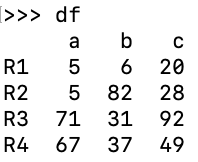

In [116]:
data = {'a':[5, 5, 71, 67], 'b':[6, 82, 31, 37],'c':[20, 28, 92, 49]} 
  
# Create DataFrame 
df = pd.DataFrame(data , index =['R1', 'R2', 'R3','R4']) 
  
# Print the output. 
df 

,a,b,c
R1,5,6,20
R2,5,82,28
R3,71,31,92
R4,67,37,49


In [117]:
f = lambda x: x.max() + x.min()
df_new = df.apply(f)

In [118]:
df_new[1]

88

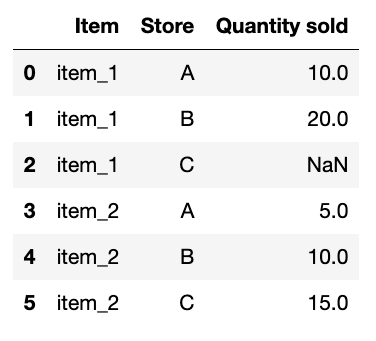

In [121]:
data = {'item':['item_1','item_1','item_1','item_2','item_2','item_2'], 'store':['A','B','C','A','B','C'],'q':[10, 20, np.NaN, 5 , 10 , 15]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,item,store,q
0,item_1,A,10.0
1,item_1,B,20.0
2,item_1,C,NaN
3,item_2,A,5.0
4,item_2,B,10.0
5,item_2,C,15.0


In [122]:
df.groupby('item').sum().iloc[0]['q']

30.0